## 布里尔分数Brier Score

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

In [2]:
digits = load_digits()  # 手写数据集
X, y = digits.data, digits.target

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

In [4]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
# 查看分数
acc_score = gnb.score(Xtest, Ytest)  # 返回预测的精确性 accuracy
# 查看预测结果
Y_pred = gnb.predict(Xtest)
# 查看预测的概率结果
prob = gnb.predict_proba(Xtest)

In [5]:
prob.shape

(540, 10)

In [6]:
np.unique(Ytest)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# 注意，第一个参数是真实标签，第二个参数是预测出的概率值
# 在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
# 要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss((Ytest==1).astype(int), prob[:, 1], pos_label=1)
# 我们的pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

0.032619662406118764

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [15]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
Xtrain.shape

(1257, 64)

In [17]:
logi = LR(C=1., solver='lbfgs', max_iter=3000,
          multi_class="auto").fit(Xtrain, Ytrain)
svc = SVC(kernel="linear", gamma=1).fit(Xtrain, Ytrain)

In [18]:
brier_score_loss((Ytest == 1).astype(
    int), logi.predict_proba(Xtest)[:, 1], pos_label=1)

0.01142642480567435

In [19]:
svc.decision_function(Xtest)

array([[ 6.24837122,  3.71700301,  2.71927921, ..., -0.31216676,
         8.31590244,  0.69032425],
       [-0.3087187 ,  9.31441373,  6.27530649, ...,  0.69093621,
         7.28364791,  3.83955107],
       [ 0.6906499 ,  2.71878697,  7.27763251, ...,  6.2744652 ,
         8.30835126,  5.28750364],
       ...,
       [ 4.78686312,  5.13417125, -0.3052943 , ...,  8.29648495,
         6.29518651,  1.69695548],
       [ 2.74874208,  2.6867217 ,  6.28769759, ...,  2.89864232,
         8.31336146,  7.27763454],
       [-0.31162689,  9.31682254,  4.89495994, ...,  5.84334803,
         7.30473457,  1.70688667]])

In [20]:
# 由于SVC的置信度并不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
svc_prob = (svc.decision_function(Xtest) - svc.decision_function(Xtest).min()) / \
    (svc.decision_function(Xtest).max() - svc.decision_function(Xtest).min())

In [21]:
brier_score_loss((Ytest == 1).astype(int), svc_prob[:, 1], pos_label=1)

0.24286480465579566

### 将每个分类器每个标签类别下的布里尔分数可视化

In [22]:
import pandas as pd
name = ["Bayes","Logistic","SVC"]
color = ["red","black","orange"]
df = pd.DataFrame(index=range(10),columns=name)
df

,Bayes,Logistic,SVC
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [23]:
for i in range(10):
    df.loc[i, name[0]] = brier_score_loss((Ytest == i).astype(
        int), prob[:, i], pos_label=i)  # 标签为i的时候的贝叶斯下的布里尔分数
    df.loc[i, name[1]] = brier_score_loss((Ytest == i).astype(
        int), logi.predict_proba(Xtest)[:, i], pos_label=i)  # 标签为i的时候逻辑回归下的布里尔分数
    df.loc[i, name[2]] = brier_score_loss((Ytest == i).astype(
        int), svc_prob[:, i], pos_label=i)  # SVC下的布里尔分数

In [24]:
df

,Bayes,Logistic,SVC
0,0.996244,0.999479,0.681634
1,0.0326197,0.0114264,0.242865
2,0.0733327,0.095298,0.251131
3,0.0806967,0.0932706,0.450271
4,0.0751393,0.0849752,0.252574
5,0.110865,0.113094,0.352765
6,0.0959412,0.0948883,0.276426
7,0.128007,0.0964966,0.28853
8,0.158683,0.104213,0.640142
9,0.0789063,0.0978492,0.396565


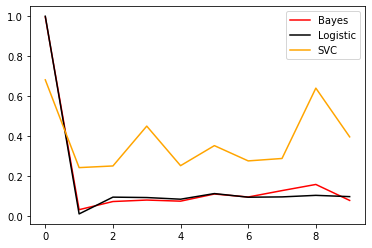

In [26]:
for i in range(df.shape[1]):
    plt.plot(range(10), df.iloc[:, i], c=color[i], label=name[i])
plt.legend()
plt.show()